In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



In [2]:
df = pd.read_csv('metaDMGresults.csv')
metadata = pd.read_csv('metadata.tsv', sep='\t')

In [3]:
df1 = df[df['N_reads'] > 500]
df1 = df1[df1['MAP_significance'] > 1]

In [4]:
metadata = metadata.sort_values(by=['years_bp'])
metadata.index = range(len(metadata))

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\1095675125.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 5, i+1)


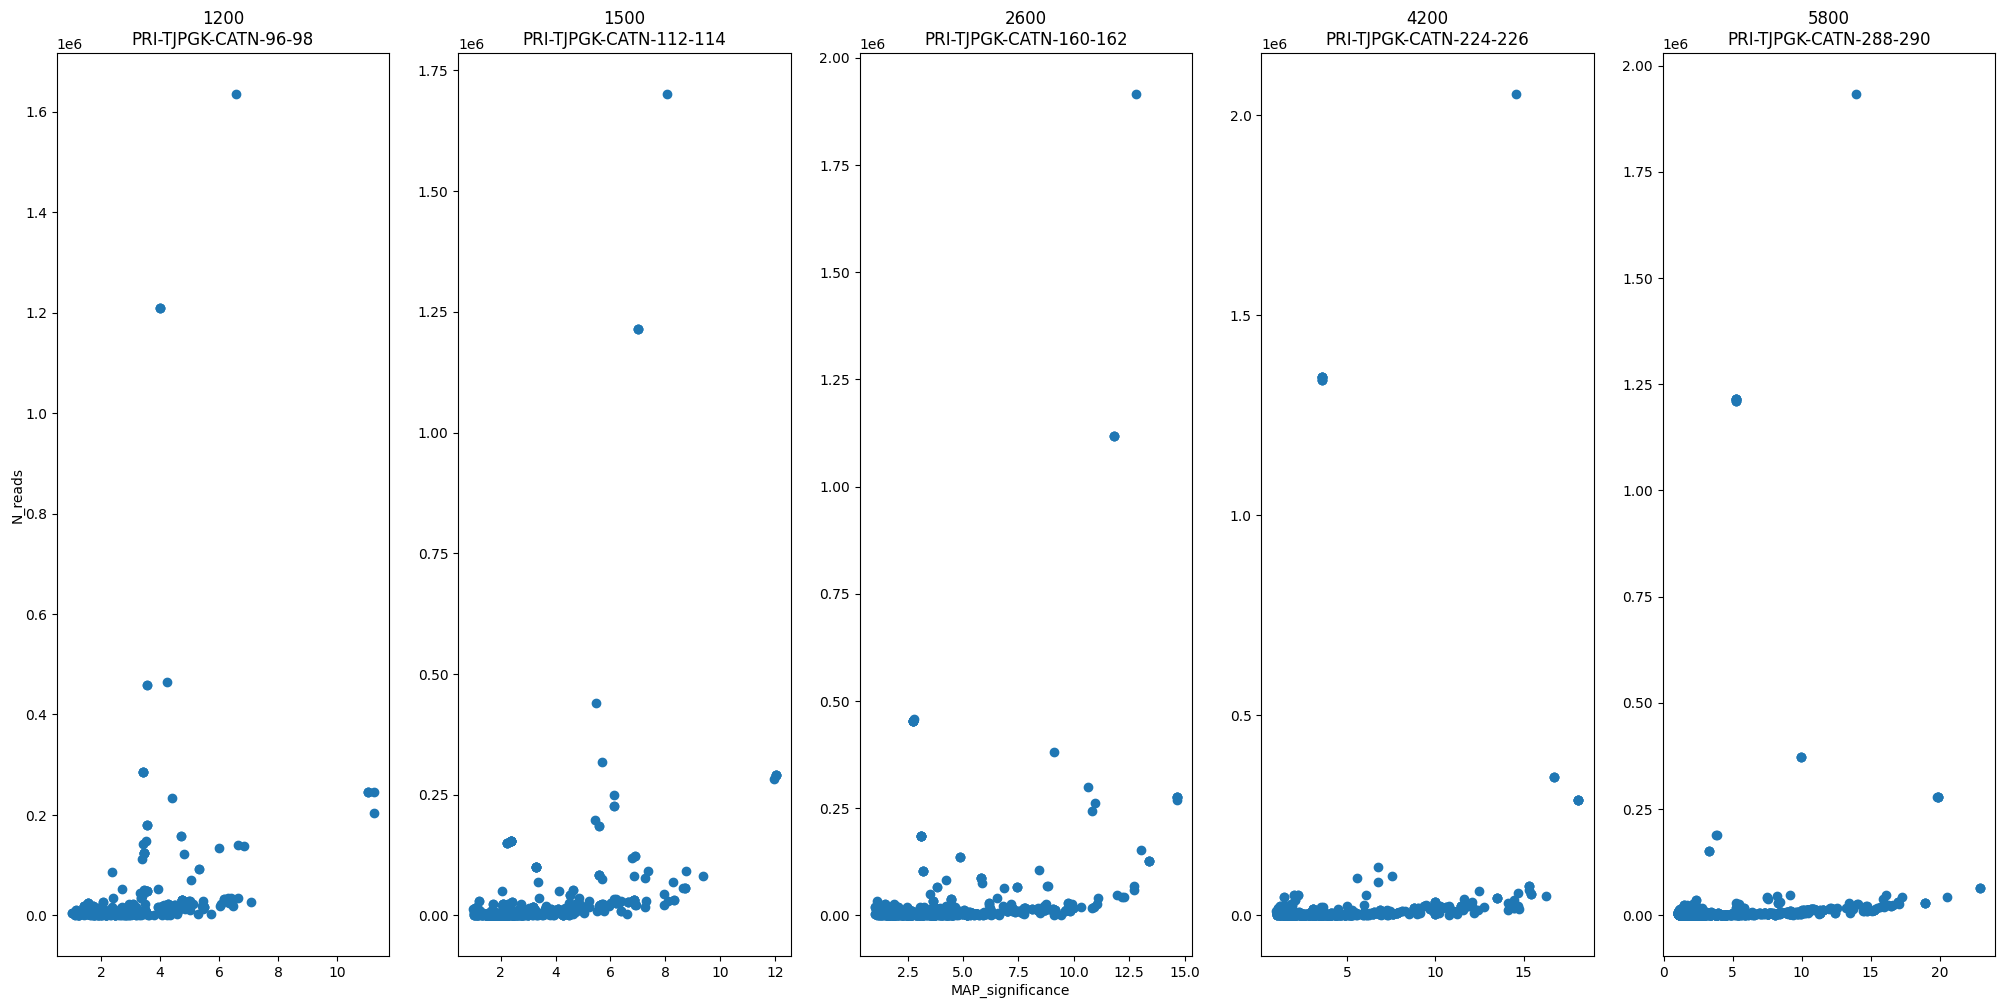

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

for i, sample in enumerate(metadata['sample_name']) :
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(f"{metadata.iloc[i,2]}\n{metadata.iloc[i,1]}")
    plt.scatter(df1[df1['sample'] == sample]['MAP_significance'], df1[df1['sample'] == sample]['N_reads'])

fig.text(0.5, 0, 'MAP_significance', ha='center')
fig.text(0, 0.5, 'N_reads', va='center', rotation='vertical')
plt.tight_layout()
plt.show()
    

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\2405295849.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 5, i+1)


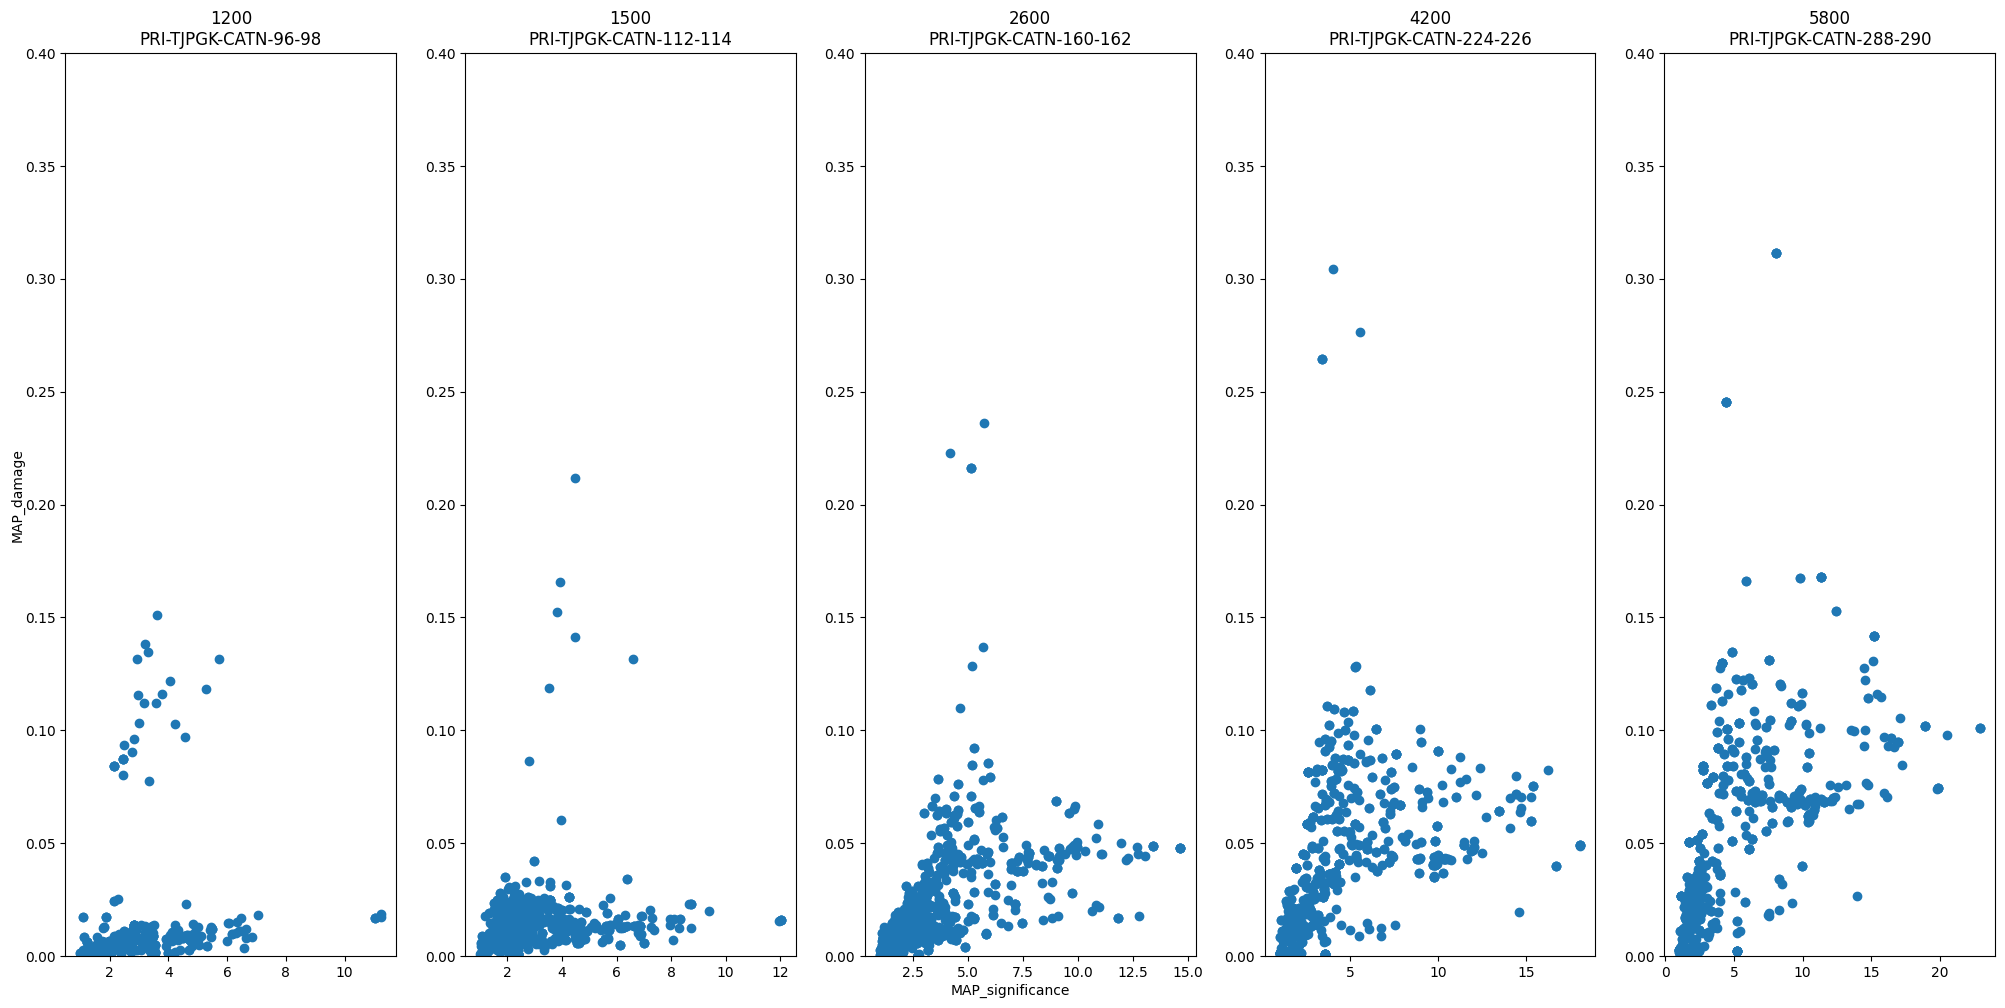

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

for i, sample in enumerate(metadata['sample_name']) :
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(f"{metadata.iloc[i,2]}\n{metadata.iloc[i,1]}")
    plt.scatter(df1[df1['sample'] == sample]['MAP_significance'], df1[df1['sample'] == sample]['MAP_damage'])
    plt.ylim(0, 0.4)

fig.text(0.5, 0, 'MAP_significance', ha='center')
fig.text(0, 0.5, 'MAP_damage', va='center', rotation='vertical')
plt.tight_layout()
plt.show()
    

In [7]:
plantdf = pd.read_csv('filtered_data_viridiplantae.csv')
plantdf2 = plantdf[['sample', 'tax_name', 'N_reads']]
plantdf3 = plantdf[['sample', 'tax_name', 'N_reads', 'MAP_significance', 'MAP_damage']]

In [8]:
tax_names = plantdf2['tax_name'].unique()
tax_names = np.sort(tax_names)
tax_names = [i.replace('g__', '') for i in tax_names]

plantdf2['tax_name'] = plantdf2['tax_name'].str.replace('g__', '')

samples = metadata['sample_name'].unique()
fdf = pd.DataFrame(index=tax_names, columns=samples)

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\2367002419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plantdf2['tax_name'] = plantdf2['tax_name'].str.replace('g__', '')


In [9]:
for sample in samples:
    for tax in tax_names:
        fdf.loc[tax, sample] = plantdf2[(plantdf2['sample'] == sample) & (plantdf2['tax_name'] == tax)]['N_reads'].sum()
    fdf[sample] = fdf[sample] * 100 / fdf[sample].sum()

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\4023588446.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 5, i+1)


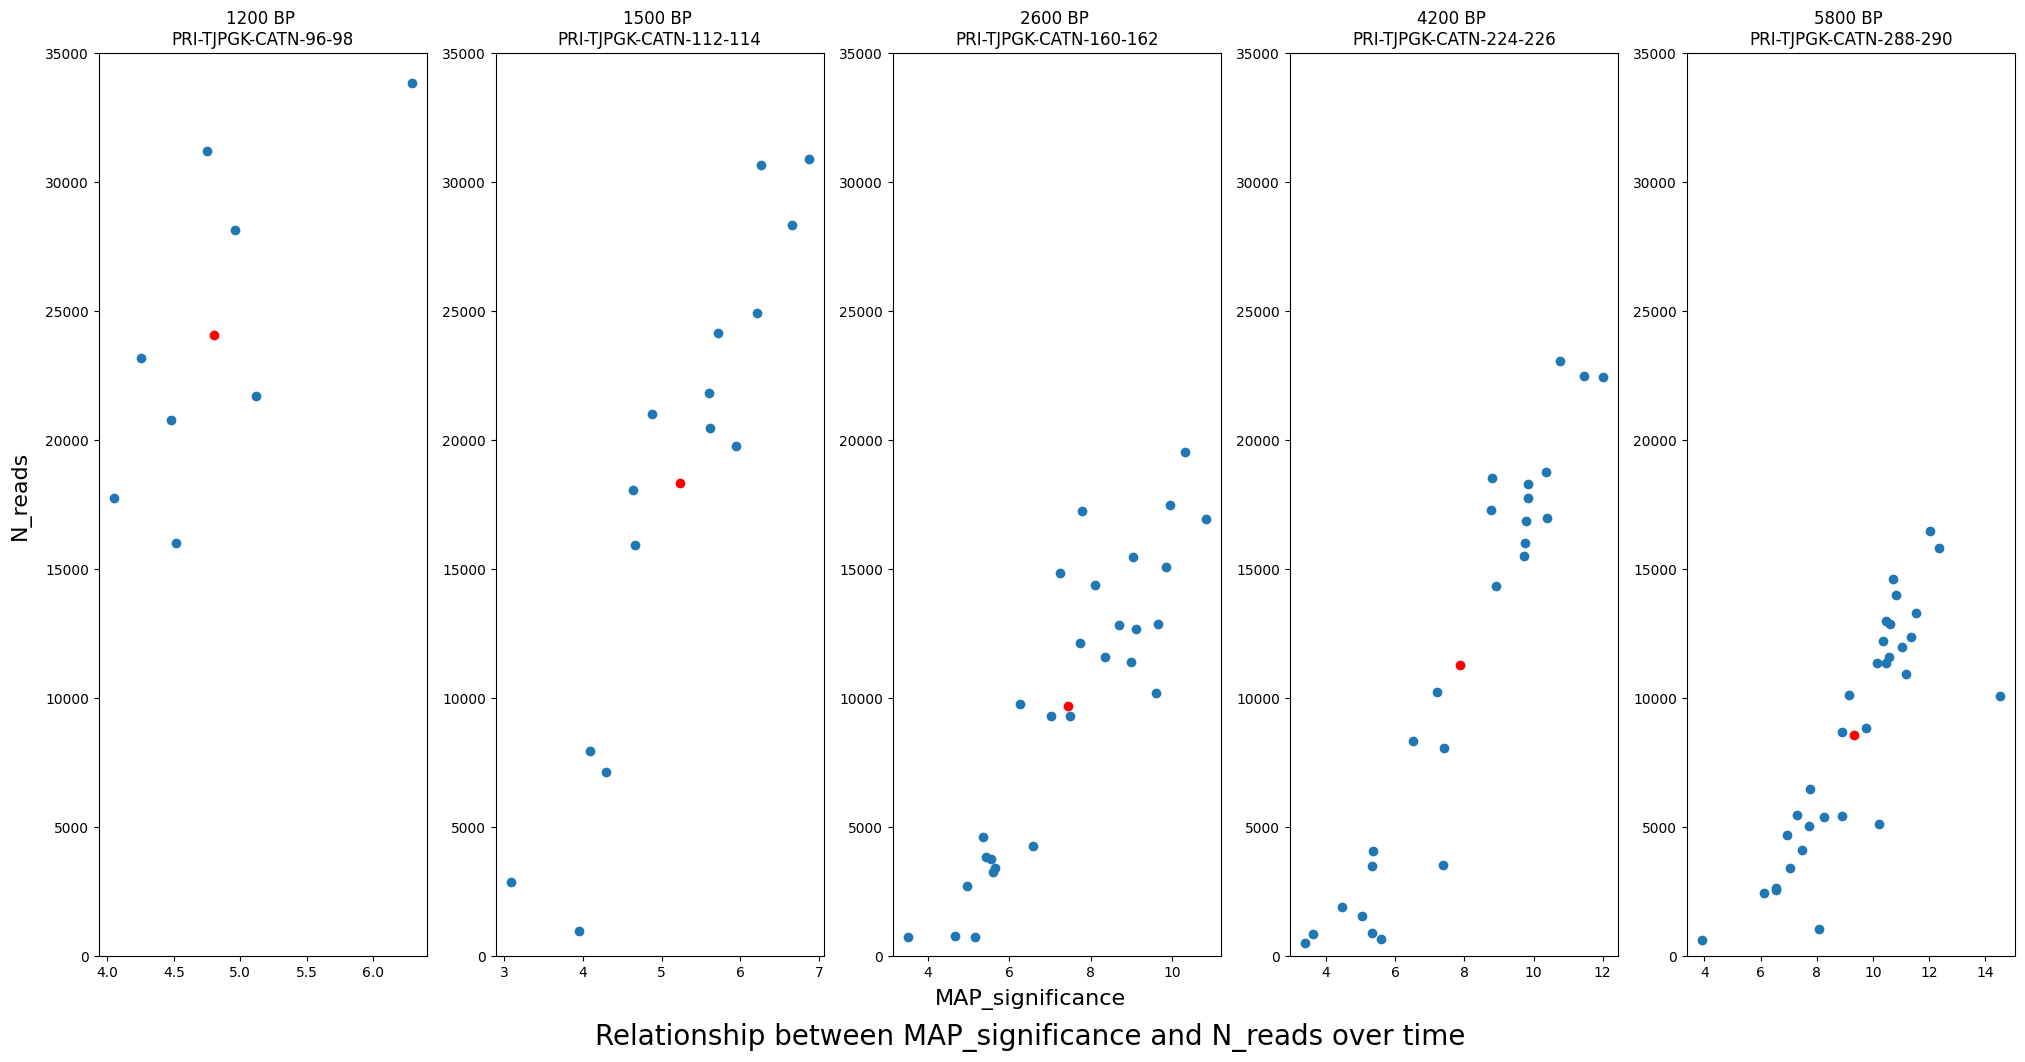

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

for i, sample in enumerate(metadata['sample_name']) :
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(f"{metadata.iloc[i,2]} BP \n{metadata.iloc[i,1]}")
    plt.scatter(plantdf3[plantdf3['sample'] == sample]['MAP_significance'], plantdf3[plantdf3['sample'] == sample]['N_reads'])
    plt.ylim(0, 35000)
    
    plt.scatter(plantdf3[plantdf3['sample'] == sample]['MAP_significance'].mean(), plantdf3[plantdf3['sample'] == sample]['N_reads'].mean(), color='red')

fig.text(0.5, -0.01, 'MAP_significance', ha='center', fontsize=16)
fig.text(-0.01, 0.5, 'N_reads', va='center', rotation='vertical', fontsize=16)

#subtitle
fig.text(0.5, -0.05, 'Relationship between MAP_significance and N_reads over time', ha='center', fontsize=20)

plt.tight_layout()
plt.show()
    

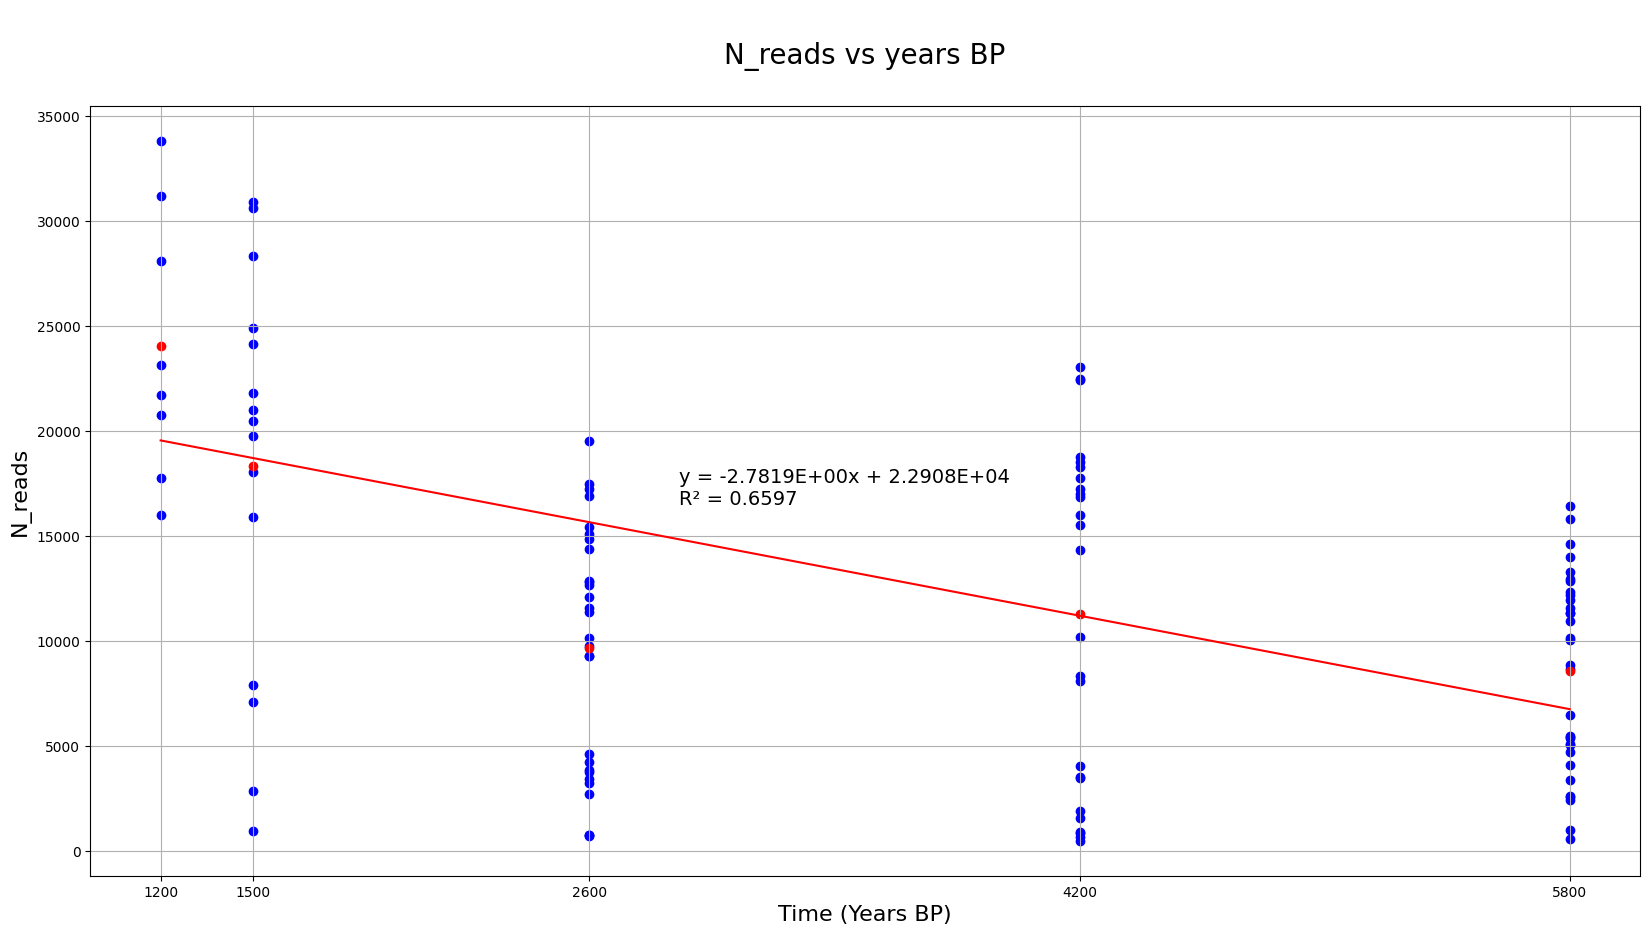

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

for i, sample in enumerate(metadata['sample_name']):
    plt.scatter([metadata['years_bp'][i] for x in range(len(plantdf3[plantdf3['sample'] == sample]['N_reads']))], plantdf3[plantdf3['sample'] == sample]['N_reads'], color='b')

mean_reads = [plantdf3[plantdf3['sample'] == sample]['N_reads'].mean() for sample in metadata['sample_name']]
plt.scatter(metadata['years_bp'], mean_reads, color='r')

plt.xlabel('Time (Years BP)', fontsize=16)
plt.ylabel('N_reads', fontsize=16)
plt.title('\nN_reads vs years BP\n', fontsize=20)

plt.xticks(metadata['years_bp'], metadata['years_bp'])

slope, intercept, r_value, p_value, std_err = stats.linregress(metadata['years_bp'], mean_reads)

plt.plot(metadata['years_bp'], intercept + slope*metadata['years_bp'], 'r', label='fitted line')

plt.text(0.38, 0.53, f"y = {slope:.4E}x + {intercept:.4E}\nR² = {r_value**2:.4f}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.grid()
plt.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\1538991337.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 5, i+1)


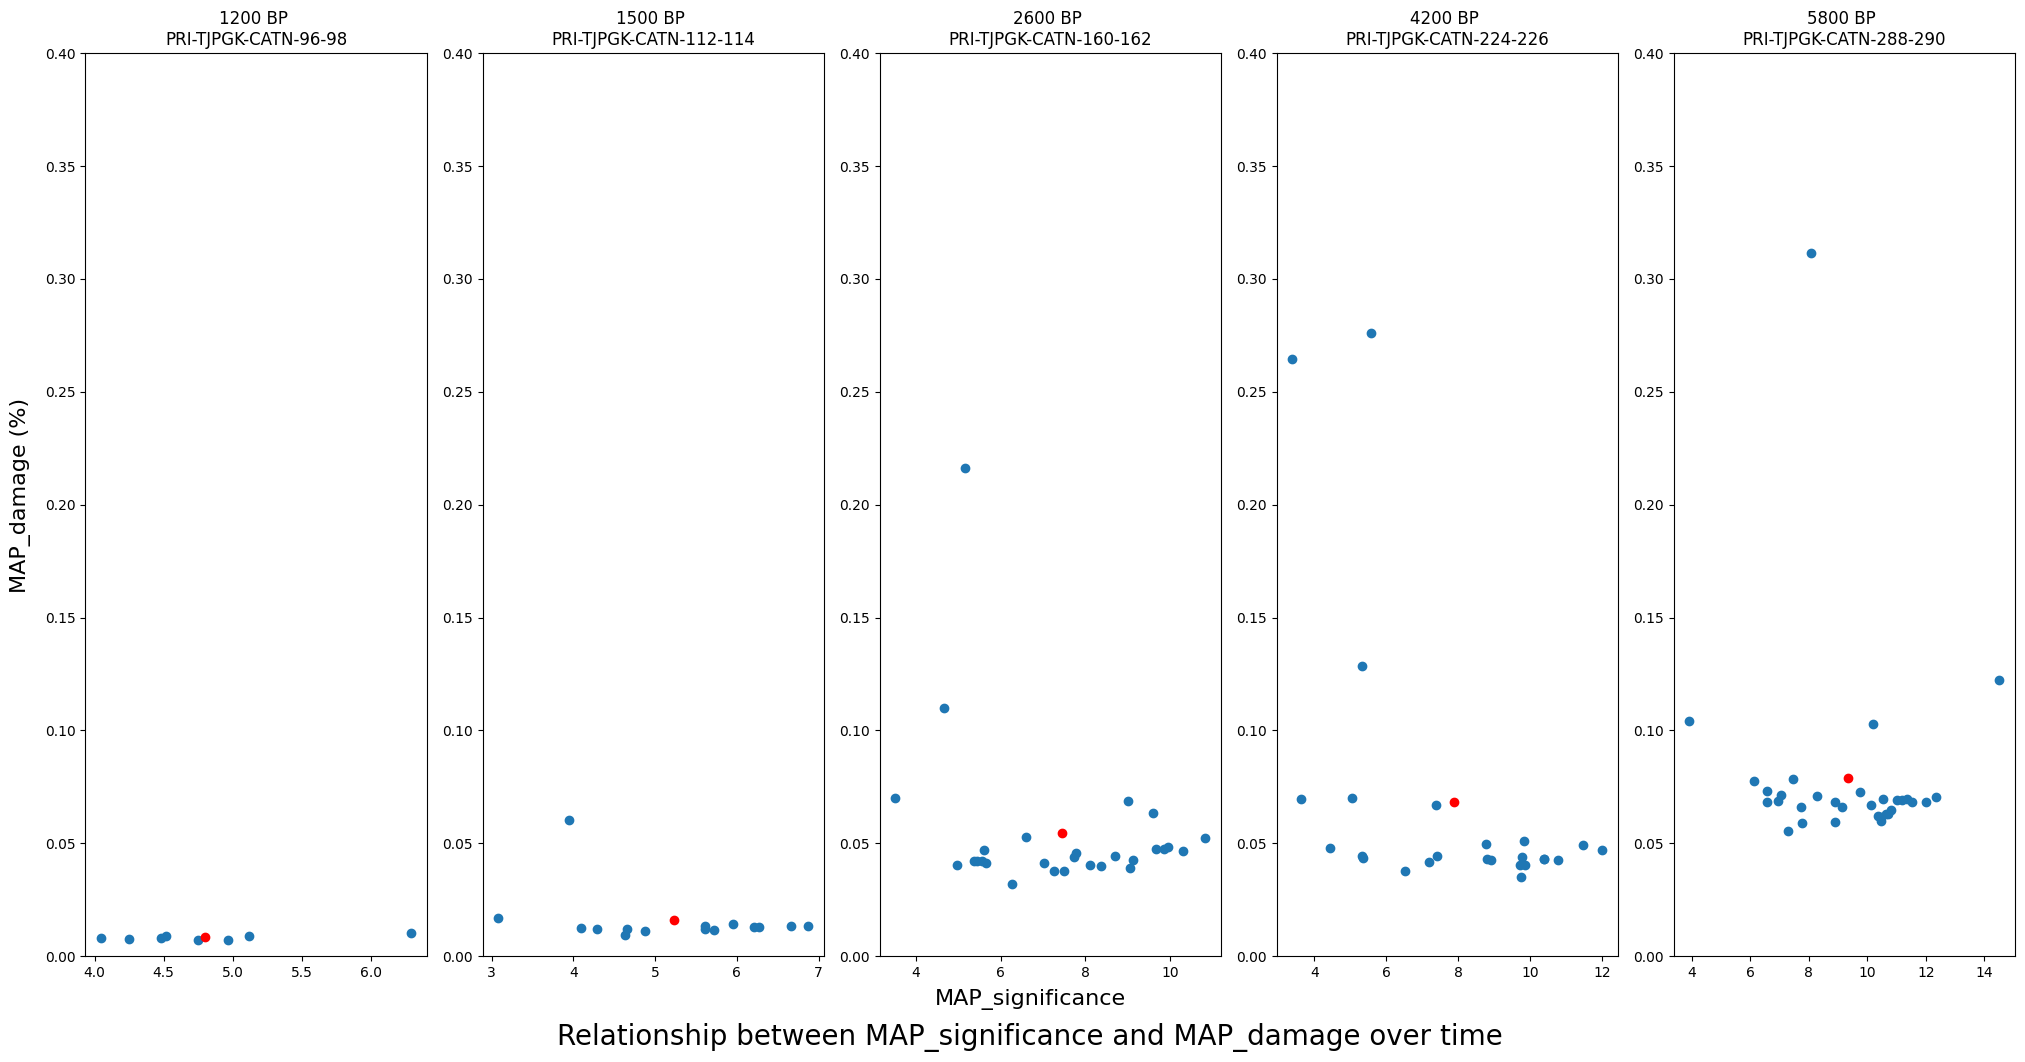

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

for i, sample in enumerate(metadata['sample_name']) :
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(f"{metadata.iloc[i,2]} BP \n{metadata.iloc[i,1]}")
    plt.scatter(plantdf3[plantdf3['sample'] == sample]['MAP_significance'], plantdf3[plantdf3['sample'] == sample]['MAP_damage'])
    plt.ylim(0, 0.4)
    
    plt.scatter(plantdf3[plantdf3['sample'] == sample]['MAP_significance'].mean(), plantdf3[plantdf3['sample'] == sample]['MAP_damage'].mean(), color='red')

fig.text(0.5, -0.01, 'MAP_significance', ha='center', fontsize=16)
fig.text(-0.01, 0.5, 'MAP_damage (%)', va='center', rotation='vertical', fontsize=16)

#subtitle
fig.text(0.5, -0.05, 'Relationship between MAP_significance and MAP_damage over time', ha='center', fontsize=20)

plt.tight_layout()
plt.show()

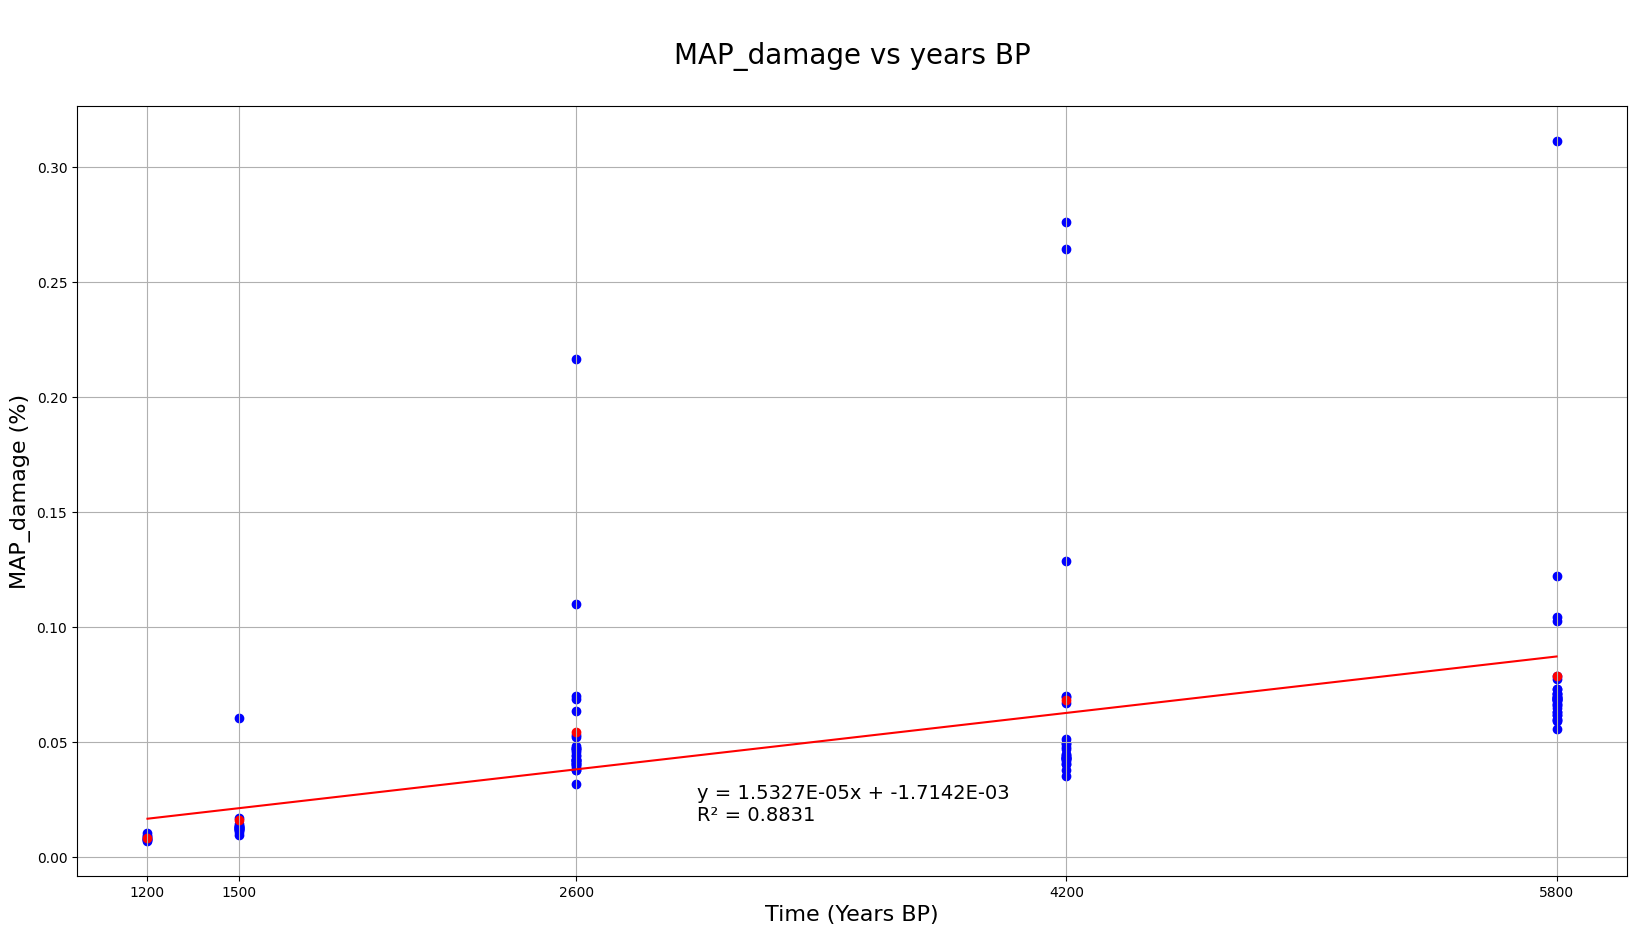

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

for i, sample in enumerate(metadata['sample_name']):
    plt.scatter([metadata['years_bp'][i] for x in range(len(plantdf3[plantdf3['sample'] == sample]['MAP_damage']))], plantdf3[plantdf3['sample'] == sample]['MAP_damage'], color='b')

mean_damage = [plantdf3[plantdf3['sample'] == sample]['MAP_damage'].mean() for sample in metadata['sample_name']]
plt.scatter(metadata['years_bp'], mean_damage, color='r')

slope, intercept, r_value, p_value, std_err = stats.linregress(metadata['years_bp'], mean_damage)
plt.plot(metadata['years_bp'], intercept + slope*metadata['years_bp'], 'r', label='fitted line')

plt.xlabel('Time (Years BP)', fontsize=16)
plt.ylabel('MAP_damage (%)', fontsize=16)
plt.title('\nMAP_damage vs years BP\n', fontsize=20)

plt.xticks(metadata['years_bp'], metadata['years_bp'])

plt.text(0.4, 0.12, f"y = {slope:.4E}x + {intercept:.4E}\nR² = {r_value**2:.4f}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.grid()
plt.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\3331144000.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = matrix.astype(np.float)


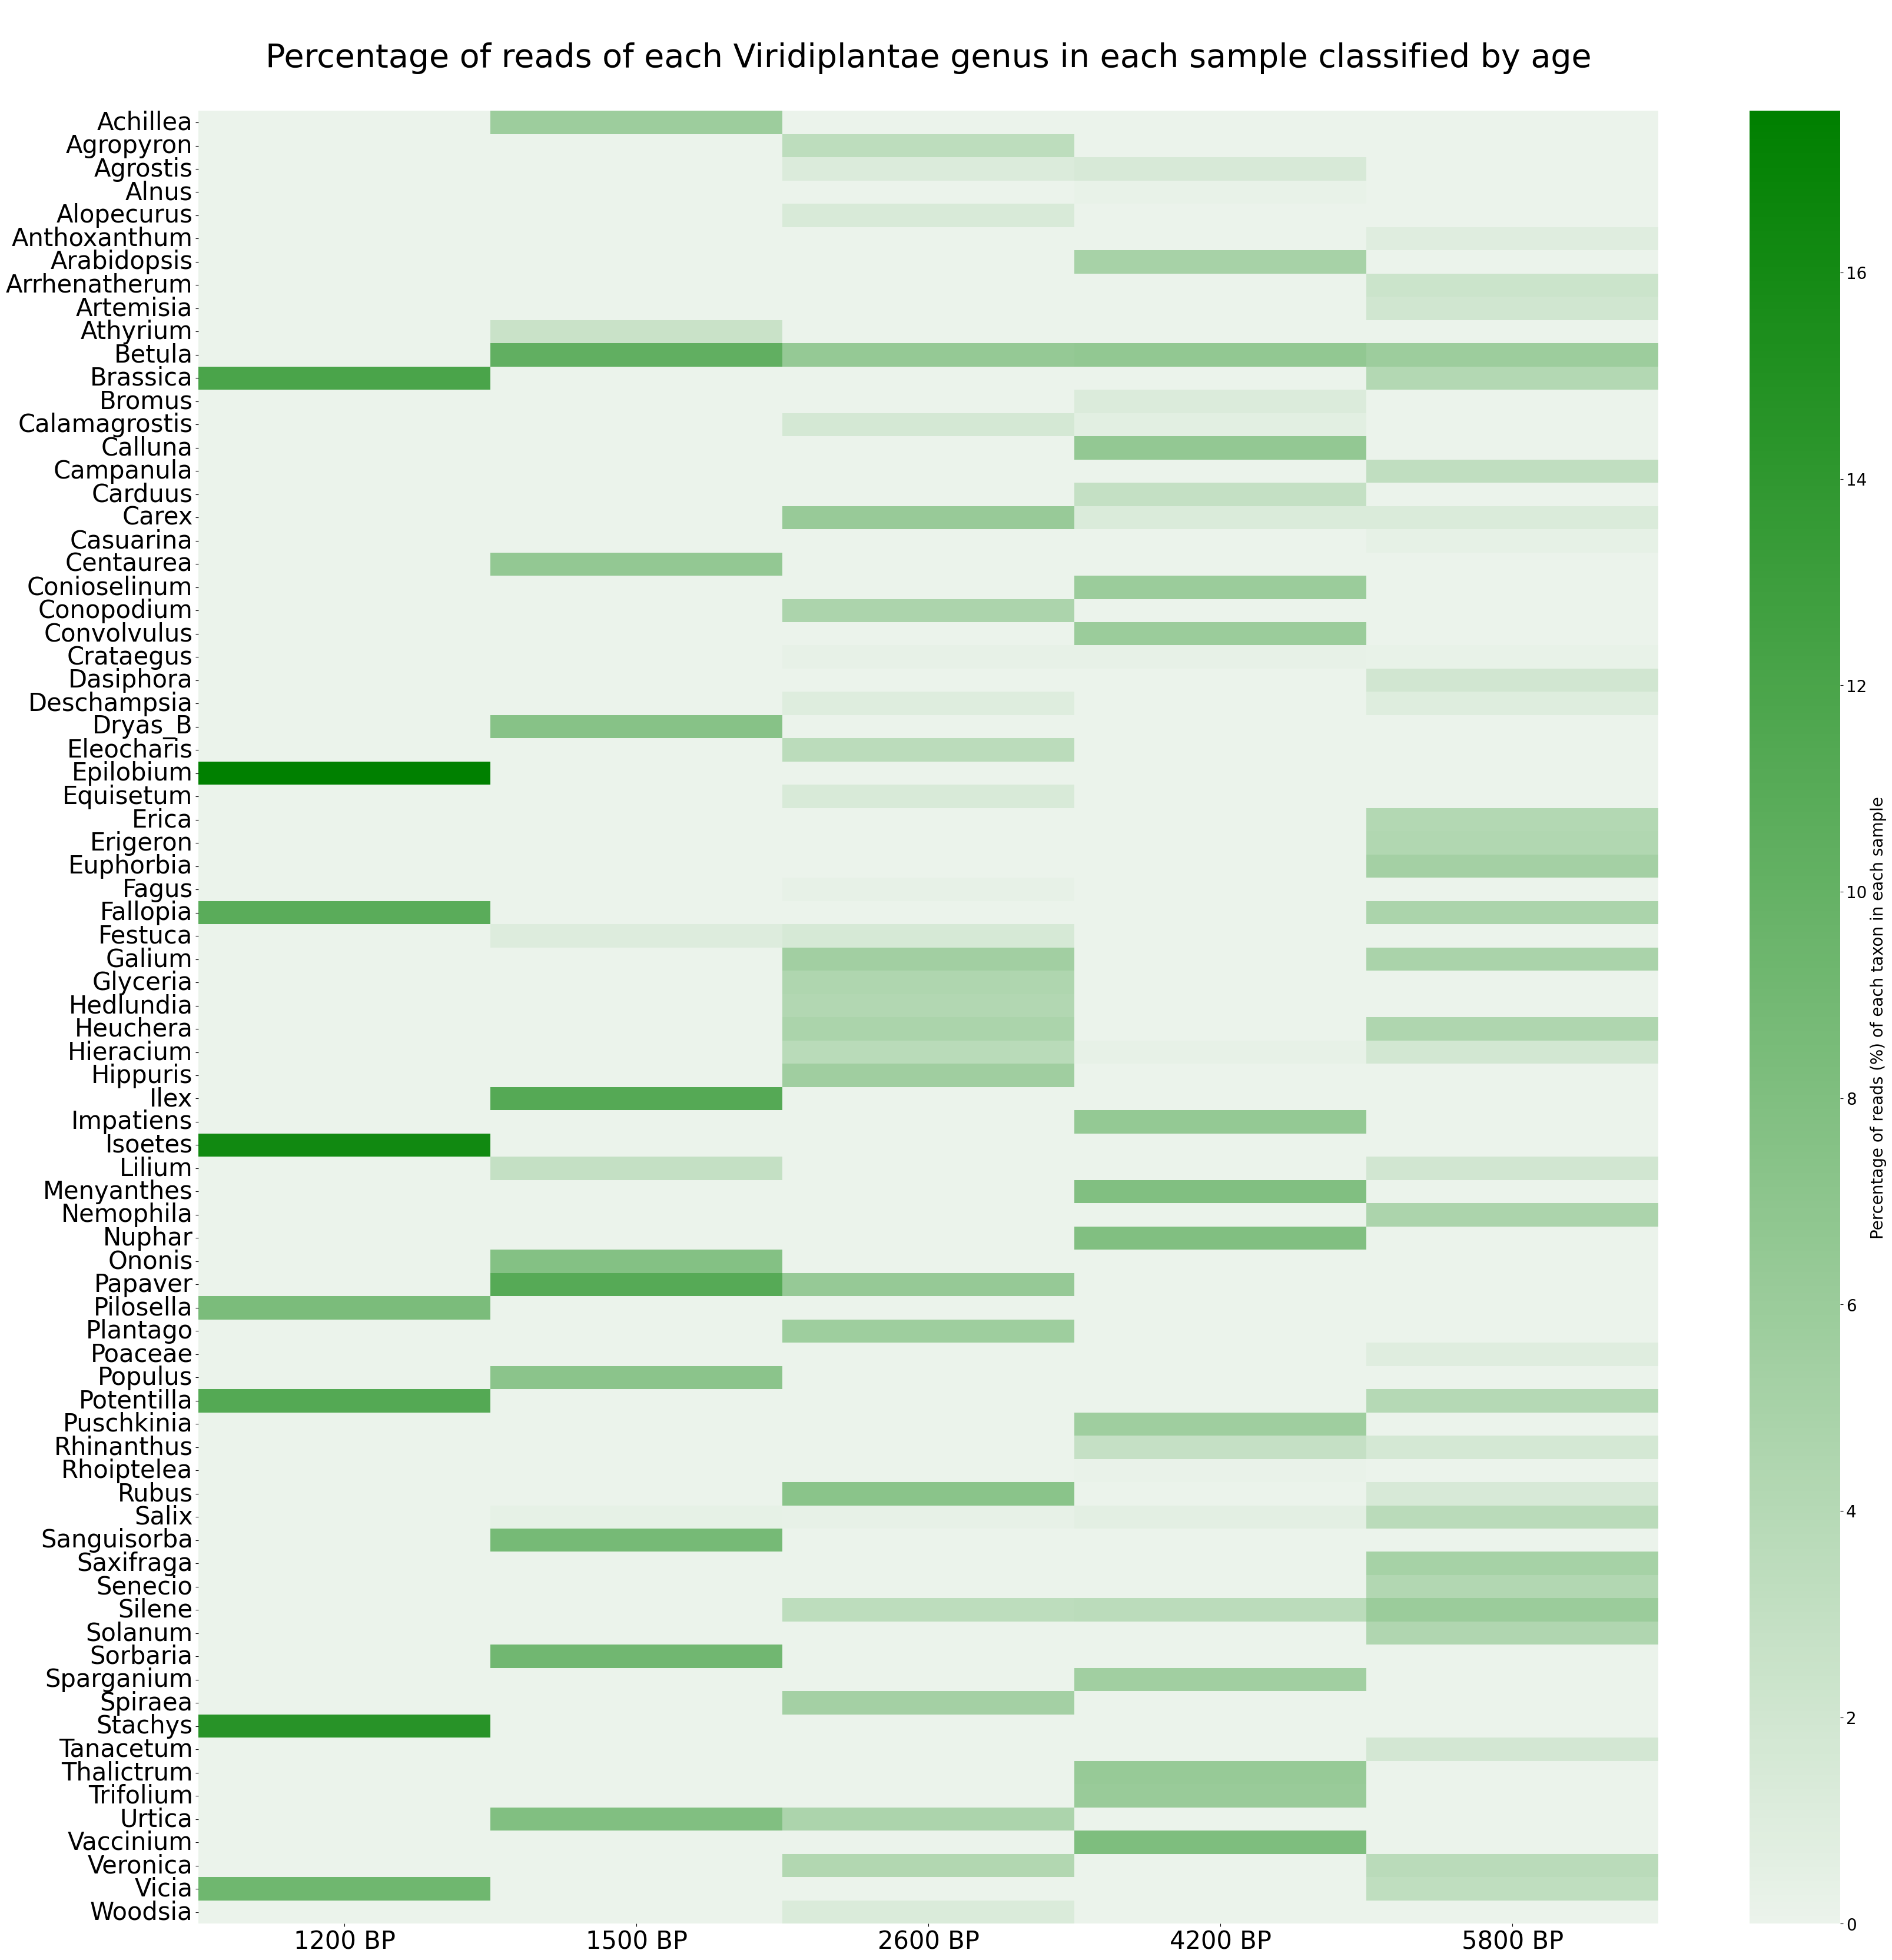

In [14]:
fig, ax = plt.subplots(figsize=(40,40))

palette = sns.light_palette("green", as_cmap=True, reverse=False, n_colors=1000)

matrix = fdf.to_numpy()
matrix = matrix.astype(np.float)
sns.heatmap(matrix, ax=ax, cmap=palette)

ax.set_xticklabels([str(x)+' BP' for x in metadata['years_bp'].unique()], rotation=0, fontsize=30)
ax.set_yticklabels(tax_names, rotation=0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Percentage of reads (%) of each taxon in each sample', rotation=90, fontsize=20)

#set title
ax.set_title('\nPercentage of reads of each Viridiplantae genus in each sample classified by age\n', fontsize=40)

plt.show()

In [15]:
dico = {"Trees/Shrubs": ["Alnus", "Betula", "Calluna", "Casuarina", "Crategus", "Erica", "Fagus", "Hedlundia", "Ilex", "Populus", "Rhoiptelea", "Rubus", "Salix"],
"Graminoids": ["Agrostis", "Alopecurus", "Anthoxanthum", "Arabidopsis", "Arrenantherum", "Bromus", "Calamagrostis", "Carex", "Deschampsia", "Elocharis", "Festuca", "Glyceria", "Poaceae"],
"Forbs": ["Achillea", "Vicia", "Veronica", "Urtica", "Trifolium", "Thalictrum", "Artemisia", "Campanula", "Carduus", "Centaurea", "Conioselinum", "Conopodium", "Convolvulus", "Crategus", "Dasiphora", "Tanacetum", "Dryas", "Epilobium", "Equisetum", "Erigeron", "Euphorbia", "Fallopia", "Galium", "Heuchera", "Hieracium", "Impatiens", "Lilium", "Nemophila", "Ononis", "Pilosella", "Plantago", "Potentilla", "Puschkinia", "Rhinanthus", "Sanguisorba", "Saxifraga", "Senecio", "Siline", "Sorbaria", "Spiraea", "Stachys", "Veronica", "Vicia"],
"Aquatics": ["Hippuris", "Isoetes", "Menyanthes", "Nuphar", "Spharganium"],
"Cultivars": ["Brassica", "Papver", "Solanum"],
"Ferns": ["Woodsia", "Athyrium"]}

C:\Users\basti\AppData\Local\Temp\ipykernel_20840\2126396108.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 3, i+1)
C:\Users\basti\AppData\Local\Temp\ipykernel_20840\2126396108.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  submatrix = submatrix.astype(np.float)
C:\Users\basti\AppData\Local\Temp\ipykernel_20840\2126396108.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. I

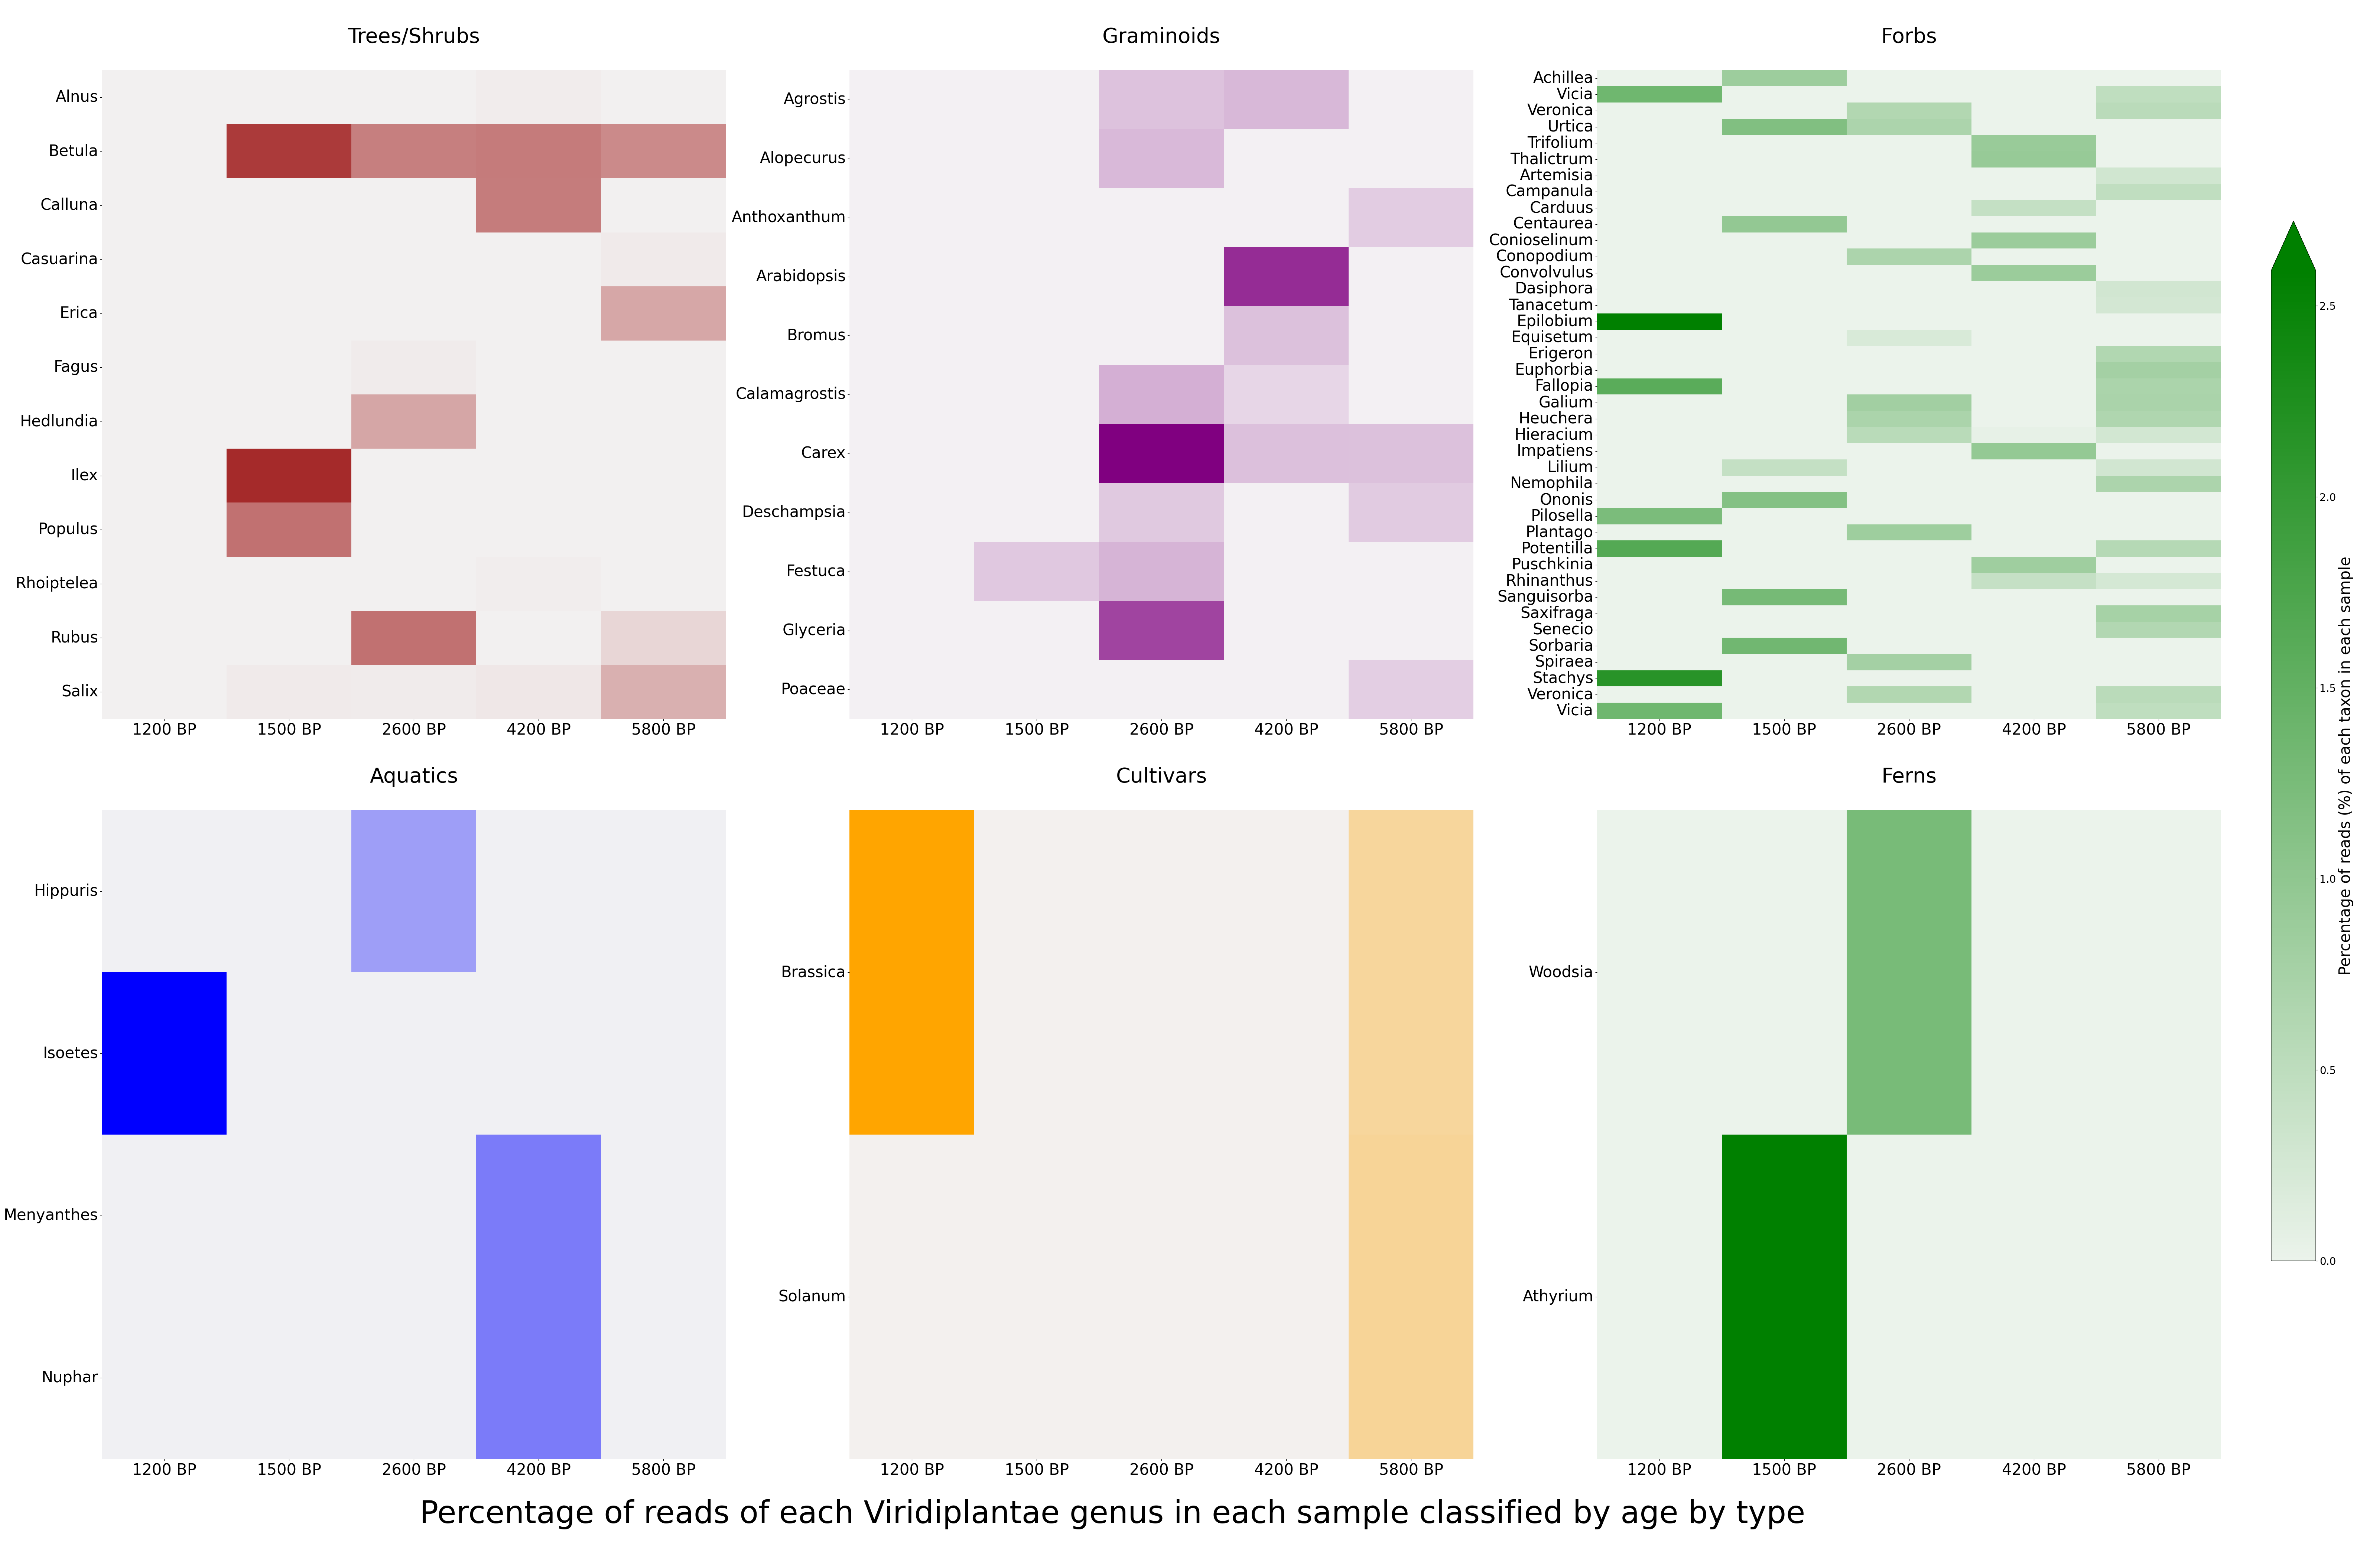

In [16]:
fig, ax = plt.subplots(figsize=(60,40))

colors = ["brown", "purple", "green", "blue", "orange", "green"]

for i, type in enumerate(dico.keys()):
    ax = plt.subplot(2, 3, i+1)
    
    species = [x for x in dico[type] if x in fdf.index]
    subdf = fdf.loc[species]
    submatrix = subdf.to_numpy()
    submatrix = submatrix.astype(np.float)

    palette = sns.light_palette(colors[i], as_cmap=True, reverse=False, n_colors=1000)

    sns.heatmap(submatrix, ax=ax, cmap=palette)

    ax.set_xticklabels([str(x)+' BP' for x in metadata['years_bp'].unique()], rotation=0, fontsize=30)
    ax.set_yticklabels(species, rotation=0, fontsize=30)

    #set title
    ax.set_title(f'\n{type}\n', fontsize=40)
    
    ax.collections[0].colorbar.remove()

cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
cbar = fig.colorbar(ax.collections[0], cax=cbar_ax, extend='max')

cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Percentage of reads (%) of each taxon in each sample', rotation=90, fontsize=30)

fig.text(0.5, -0.05, 'Percentage of reads of each Viridiplantae genus in each sample classified by age by type\n', ha='center', fontsize=60)

plt.tight_layout()
plt.show()